#HDSC Fall Internship Project- Practical Time Series Analysis and Forecast.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/Time_series_analysis_and_forecast_DATASET.csv")

In [3]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
df[ "Date" ] = pd.to_datetime(df[ "FullDate" ])

In [5]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
Date         0
dtype: int64

In [6]:
df.set_index( "Date" , inplace= True ) 

In [7]:
df_daily = df.resample( 'D' ).mean()

##Question 11

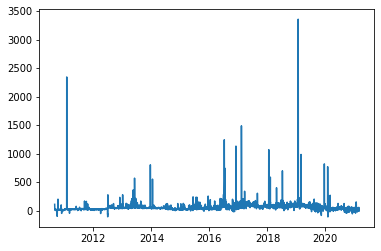

In [8]:
plt.plot(df_daily.index, df_daily['ElecPrice'])

## Question 12

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
adfuller(df_daily['SysLoad'])

(-3.6901589888366413,
 0.0042537255045741835,
 30,
 3803,
 {'1%': -3.432070672988693,
  '5%': -2.8623002987378547,
  '10%': -2.567174716967499},
 54930.737615237456)

In [11]:
adfuller(df_daily['GasPrice'])

(-2.902766697165181,
 0.045027212884625294,
 27,
 3806,
 {'1%': -3.4320693157877544,
  '5%': -2.8622996992165364,
  '10%': -2.5671743978048323},
 8685.261996278323)

## Question 13

In [12]:
adfuller(df_daily['ElecPrice'])

(-8.269053866873804,
 4.848817773711633e-13,
 20,
 3813,
 {'1%': -3.432066157296446,
  '5%': -2.8622983040036005,
  '10%': -2.5671736550459663},
 44958.0861741366)

## Question 14

In [13]:
!pip install prophet

import prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from prophet import Prophet

In [35]:
df_daily = df_daily.reset_index()
df_daily = df_daily.rename(columns={'Date':'ds', 'ElecPrice':'y'})

In [36]:
train_set = df_daily[:2757]
test_set = df_daily[2757:]

In [37]:
train_set = train_set[['ds', 'y']]
test_set = test_set[['ds', 'y']]

In [38]:
model = Prophet()
model.fit(train_set)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9s687zk2/s94z69vo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9s687zk2/z08l9g5r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90391', 'data', 'file=/tmp/tmp9s687zk2/s94z69vo.json', 'init=/tmp/tmp9s687zk2/z08l9g5r.json', 'output', 'file=/tmp/tmp9s687zk2/prophet_model8g7tm0fg/prophet_model-20230125011323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:13:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:13:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [39]:
import sklearn.metrics as metrics

In [40]:
prediction = model.predict(pd.DataFrame({'ds':test_set['ds']}))
y_actual = test_set['y']
y_predicted = prediction['yhat']
y_predicted = y_predicted.astype(int)

In [41]:
round(metrics.mean_absolute_percentage_error(y_actual, y_predicted), 2)

5.46

## Question 15

In [43]:
round((metrics.mean_squared_error(y_actual, y_predicted)**0.5), 2)

133.75

## Question 16

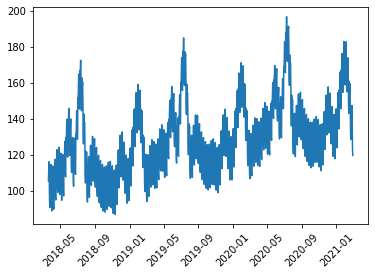

In [65]:
plt.plot(prediction['ds'], prediction['yhat'])
plt.xticks(rotation=45)
plt.show()

## Question 17

In [52]:
train_set = df_daily[:2757]
test_set = df_daily[2757:]

In [55]:
multi_model = Prophet()
multi_model.fit(train_set)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9s687zk2/dv9xla3k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9s687zk2/litc6gvn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21570', 'data', 'file=/tmp/tmp9s687zk2/dv9xla3k.json', 'init=/tmp/tmp9s687zk2/litc6gvn.json', 'output', 'file=/tmp/tmp9s687zk2/prophet_modeld3nns9dx/prophet_model-20230125012351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:23:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:23:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [68]:
prediction = multi_model.predict(pd.DataFrame({'ds':test_set['ds']}))
y_actual = test_set['y']
y_predicted = prediction['yhat']
y_predicted = y_predicted.astype(int)

In [69]:
metrics.mean_absolute_percentage_error(y_actual, y_predicted)

5.463634666817054

## Question 18

In [70]:
metrics.mean_squared_error(y_actual, y_predicted)**0.5

133.75422861358547

## Question 19

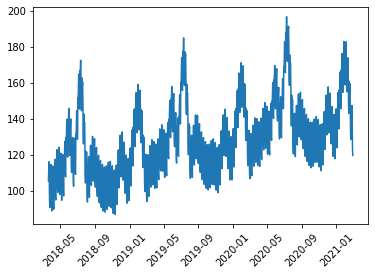

In [71]:
plt.plot(prediction['ds'], prediction['yhat'])
plt.xticks(rotation=45)
plt.show()

## Question 20

In [66]:
train_set = train_set.drop(['Tmax'], axis=1)
test_set = test_set.drop(['Tmax'], axis=1)

In [67]:
multi_model2 = Prophet()
multi_model2.fit(train_set)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9s687zk2/sjnuipff.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9s687zk2/3hbs0mwn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96940', 'data', 'file=/tmp/tmp9s687zk2/sjnuipff.json', 'init=/tmp/tmp9s687zk2/3hbs0mwn.json', 'output', 'file=/tmp/tmp9s687zk2/prophet_model95z4od4z/prophet_model-20230125013722.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:37:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:37:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [73]:
prediction = multi_model2.predict(pd.DataFrame({'ds':test_set['ds']}))
y_actual = test_set['y']
y_predicted = prediction['yhat']
y_predicted = y_predicted.astype(int)

In [74]:
metrics.mean_absolute_percentage_error(y_actual, y_predicted)

5.463634666817054